In [1]:
Consumer_API_key = 'your_key'
Consumer_API_secret_key = 'your_key'
Access_token = 'your_key'
Access_token_secret = 'your_key'

In [2]:
import tweepy
from tweepy import OAuthHandler              # Authentication based on our credentials
from tweepy import Stream     
from tweepy.streaming import StreamListener  # Firehose of twitter based on hashtags or keywords

In [1192]:
import pandas as pd
import googlemaps
from textblob import TextBlob  # Extract Sentiment polarity & subjectivity, Negative -1, positive +1, and neutral 0
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')                # Valence Aware Dictionary and Sentiment Reasoner, it's a Lexicon tool
import numpy as np
from collections import Counter
import re
from datetime import datetime
import matplotlib.pyplot as plt

from geotext import GeoText
from geopy.geocoders import Nominatim  # OpenStreetMap model by wikipedia,reverse geocodes and returns its coordinates.
from geopy.exc import GeocoderTimedOut # Geopy Abstract’s Nominatim’s API
from shapely.geometry import Point, Polygon
import geopandas as gpd
import descartes

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import operator

import spacy 
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
from spacy import displacy


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/heisenberg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
auth = tweepy.OAuthHandler(Consumer_API_key, Consumer_API_secret_key)
auth.set_access_token(Access_token, Access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)          # Every 15 minutes, we have limit of extracting 1500 tweets

In [706]:
#keyword_search = input('What you like to analyze : ')
#since_time = input('Since when would you like to analyze this keyword : ')
#no_tweets_to_analyze = int(input('How many tweets you want to analyze : '))

keyword_search='#corona'
since_time= datetime.now().strftime("%Y-%m-%d") #'2020-05-05'
print(since_time)
no_tweets_to_analyze= 1000

2020-05-07


In [718]:
#geo = '76.7766974,30.3781788,1000mi'
#geocode = geo
tweets_saver = tweepy.Cursor(api.search,
                             q=keyword_search,
                             #tweet_mode='extended',    # Otherwise tweets will be truncated
                             lang='en',
                             since=since_time).items(no_tweets_to_analyze)  # Pull 50 records

In [717]:
#tweets = [[tweet.full_text] for tweet in tweets_saver]
#tweets

for tweet in tweets_saver:
    print(tweet.text)
    

RT @nottybhati3: What Sona wants to do to #Corona Collision symbol💥 i love you @sonakshisinha  didi https://t.co/Gsesf6TDwW
RT @AsadmAijaz: Do listen to this #Dogri song on #Corona . Singers deserve a big applause 👏👏👏 https://t.co/WQijWZBB2f
@DefenceFinland @valtioneuvosto @anttikaikkonen Best of luck Minister @anttikaikkonen 
Fighting with #Corona needs… https://t.co/b4xSQugpBf
RT @SMWPramesh: Inviting everyone to join for Daily Motivation
LinkedIn  : https://t.co/9rmsETvKjH
Follow my blog: https://t.co/pvjfcI3B7x…
New #Corona hairstyle 😁 https://t.co/ZJ34MFP1rU
#Corona proof individual https://t.co/EdwOQsaZ5E
RT @DeepalTrevedie: 30 samples of #cadilaPharma employees were randomly taken and 21 of them came #COVIDー19 positive! And more.... none wer…
RT @C3_Nik: In history, such as with the Spanish Flu, the first wave was not the big problem. The second wave was.

Why? Because people bec…
RT @JustBilkees: Let's #jihaad against #Corona
#Covid_19
#coronavirus
Fuck corona, covid 19.  We’ll

KeyboardInterrupt: 

In [720]:
# tweettext = str( tweet.full_text.lower().encode('ascii',errors='ignore'))
df_list = [[tweet.user.screen_name, tweet.text ,tweet.user.followers_count, tweet.user.location, tweet.source, tweet.created_at ] for tweet in tweets_saver]

In [722]:
df_main = pd.DataFrame(df_list, columns =['user_name','tweet','followers','user_location','source', 'published_time'])
#df_main.head()

,user_name,tweet,followers,user_location,source,published_time
0,amnayousef_,RT @Jay_Apoorva18: #Cuddalore Police coffin da...,2,,Twitter for Android,2020-05-07 10:15:06
1,viraldubal1,RT @Aryanwarlord: #Corona proof individual htt...,111,"Gandhinagar, India",Twitter for Android,2020-05-07 10:15:05
2,AmarBirsingh_,RT @sonakshisinha: What Sona wants to do to #C...,25,punajb india,Twitter for Android,2020-05-07 10:15:05
3,TamuorM,RT @sonakshisinha: What Sona wants to do to #C...,83,"McKinney, TX",Twitter for Android,2020-05-07 10:15:01
4,gazavitogambino,RT @FrankBullitt39: UBER LOST 6.9 BILLION in 2...,70,,Twitter for iPhone,2020-05-07 10:14:55


In [777]:
df = df_main.copy()

In [778]:
import re,string

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
            text = text.replace('RT','')
            #text = text.encode('ascii', 'ignore').decode('ascii')   # Remove Emojis
            text = emoji.demojize(text)   # Convert Emojis to text expression
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

clean_text = []
for t in df['tweet']:
    clean_text.append(strip_all_entities(strip_links(t)))
    
df['clean_tweet'] = clean_text
#df.drop('tweet', axis=1, inplace = True)

In [779]:
df.head()

,user_name,tweet,followers,user_location,source,published_time,clean_tweet
0,amnayousef_,RT @Jay_Apoorva18: #Cuddalore Police coffin da...,2,,Twitter for Android,2020-05-07 10:15:06,Apoorva18 Police coffin dance awareness Our po...
1,viraldubal1,RT @Aryanwarlord: #Corona proof individual htt...,111,"Gandhinagar, India",Twitter for Android,2020-05-07 10:15:05,proof individual
2,AmarBirsingh_,RT @sonakshisinha: What Sona wants to do to #C...,25,punajb india,Twitter for Android,2020-05-07 10:15:05,What Sona wants to do to collision
3,TamuorM,RT @sonakshisinha: What Sona wants to do to #C...,83,"McKinney, TX",Twitter for Android,2020-05-07 10:15:01,What Sona wants to do to collision
4,gazavitogambino,RT @FrankBullitt39: UBER LOST 6.9 BILLION in 2...,70,,Twitter for iPhone,2020-05-07 10:14:55,UBER LOST 6 9 BILLION in 2019 Mr Khosrowshahi ...


##### Polarity is aggregated score which indicates 
- If it's > 0 , it's Positive
- If it's = 0 , it's Neutral
- If it's < 0 , it's Negative

In [780]:
df['Polarity_TextBlob'] = df['clean_tweet'].apply(lambda each_tweet: TextBlob(each_tweet).sentiment.polarity)
df['Polarity_TextBlob'] = round(df['Polarity_TextBlob'], 2)

In [781]:
nltk_analyzer = SentimentIntensityAnalyzer()

df['Polarity_NLTK'] = df['clean_tweet'].apply(lambda each_tweet: nltk_analyzer.polarity_scores(each_tweet)['compound'])
df['Polarity_NLTK'] = round(df['Polarity_NLTK'], 2)

df['score_pos_nltk'] = df['clean_tweet'].apply(lambda each_tweet: nltk_analyzer.polarity_scores(each_tweet)['pos'])
df['score_pos_nltk'] = round(df['score_pos_nltk'], 2)

df['score_neg_nltk'] = df['clean_tweet'].apply(lambda each_tweet: nltk_analyzer.polarity_scores(each_tweet)['neg'])
df['score_neg_nltk'] = round(df['score_neg_nltk'], 2)

In [750]:
def sentiment_scores(df, actual_score): 
    score_sentiment = []
    for i in df[actual_score]:
        if i > 0.00 : 
            score_sentiment.append("Positive") 
        elif i <  0.00 : 
            score_sentiment.append("Negative") 
        elif i ==  0.00 : 
            score_sentiment.append("Neutral") 
    return score_sentiment

In [782]:
df['sentiment_textblob']=sentiment_scores(df,'Polarity_TextBlob')
df['sentiment_nltk']=sentiment_scores(df,'Polarity_NLTK')
#df.drop(['score_textblob','score_nltk'], axis=1, inplace = True)

In [783]:
check = np.where(df['sentiment_textblob'] == df['sentiment_nltk'], 'similar', 'not_similar')
Counter(check)

Counter({'similar': 522, 'not_similar': 475})

In [ ]:
df['clean_tweet'].iloc[6]

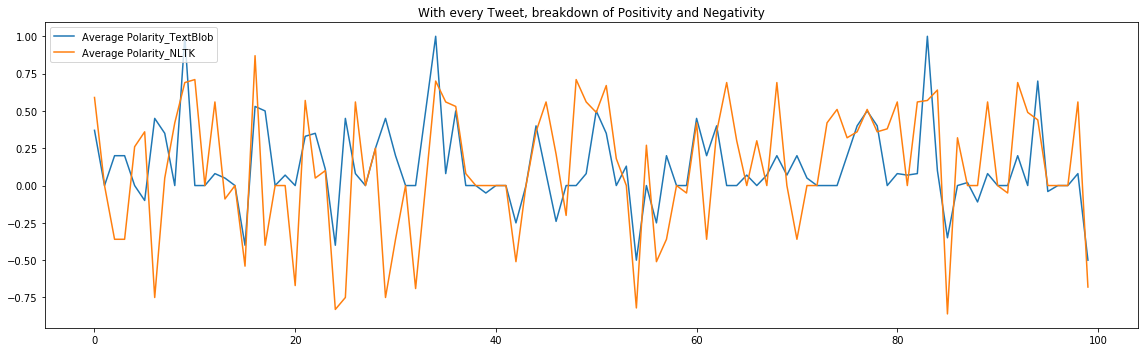

In [805]:
fig = plt.figure(figsize=(16,5))
y1 = df['Polarity_TextBlob'].head(100).values
y2 = df['Polarity_NLTK'].head(100).values
plt.cla()
plt.plot(y1, label = 'Average Polarity_TextBlob')
plt.plot(y2, label = 'Average Polarity_NLTK')
plt.legend(loc='upper left')
plt.title('With every Tweet, breakdown of Positivity and Negativity')
plt.tight_layout()
animation.FuncAnimation(fig, animate, interval=1, fargs=(0.2,))

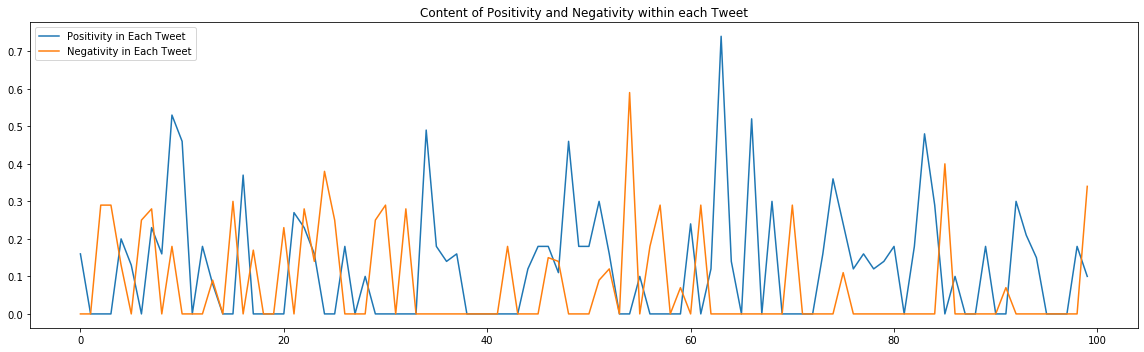

In [806]:
fig = plt.figure(figsize=(16,5))
y1 = df['score_pos_nltk'].head(100).values
y2 = df['score_neg_nltk'].head(100).values
plt.cla()
plt.plot(y1, label = 'Positivity in Each Tweet')
plt.plot(y2, label = 'Negativity in Each Tweet')
plt.legend(loc='upper left')
plt.title('Content of Positivity and Negativity within each Tweet')
plt.tight_layout()
animation.FuncAnimation(fig, animate, interval=1, fargs=(0.2,))

In [893]:
city_list =[]
country_list =[]
for i in df['user_location']:
    places = GeoText(i)
    cities = list(places.cities)
    countries = list(places.countries)
    city_list.append(cities)
    country_list.append(countries)

for i in range(len(country_list)):
    if country_list[i]==[] and city_list[i]!=[]:
        country_list[i].append(city_list[i][0])
        
country_list = np.array([l[0] if l else np.nan for l in country_list])
len(country_list)

997

In [895]:
geolocator = Nominatim(timeout=10) # Timeout to 2 seconds which means, if search takes longer than 2 seconds, it’s not really a city name
#geolocator = Nominatim()
lat_lon = []                 # Let's transforme tuples into point objects, so that shapely library can plot it on map
for country in country_list: 
    if country != None:
        #print(country)
        location = geolocator.geocode(country)
        print(location)
        lat_lon.append((location.latitude, location.longitude))
    else:
        lat_lon.append((27.2038, 77.5011))   # This is some default Geo details I am adding , its better to add some place where you think no one uses internet or twitter
        
df['coordinates']=lat_lon
print('Finished')

/Users/heisenberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
भारत - India
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
McKinney, Collin County, Texas, United States of America
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
भारत - India
Jammu, Jammu and Kashmir, 180001, India
Sverige
भारत - India
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
Nanno, Comunità della Val di Non, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38012, Italia
پاکستان
Nanno, Comunità della Val di Non, Provincia di Trento, T

In [448]:
#df['coordinates'].replace('n/a', np.NaN, inplace=True)
#df['coordinates'] = df['coordinates'].apply(lambda x: (27.2038, 77.5011) if x is np.nan else x)

/Users/heisenberg/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



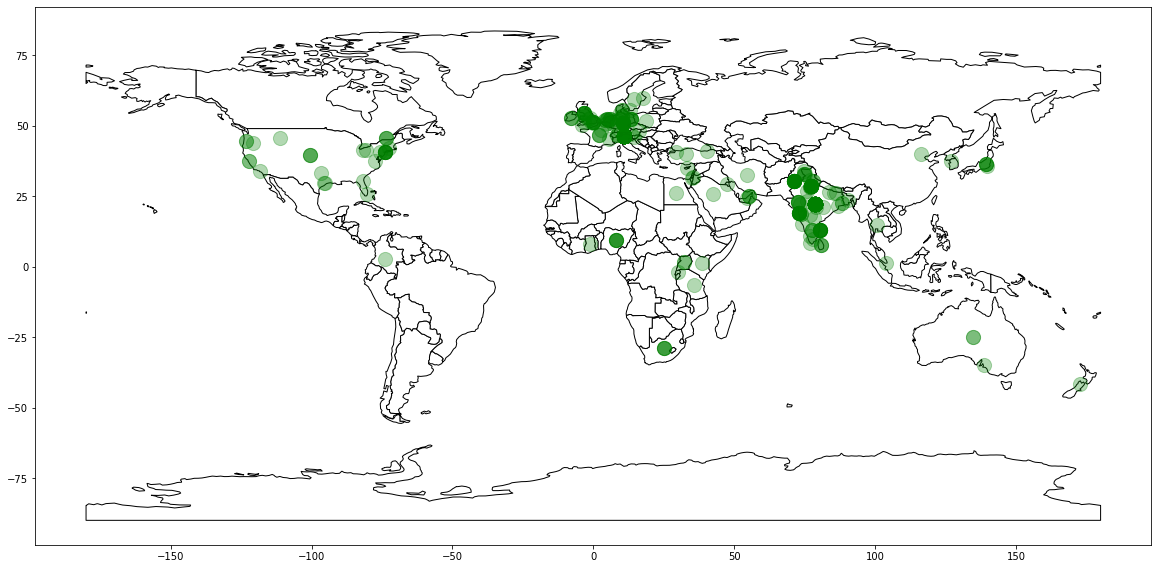

In [897]:
geometry = [Point(x[1], x[0]) for x in df['coordinates']]
geographical_df = gpd.GeoDataFrame(df, crs = {'init': 'epsg:4326'}, geometry=geometry) # crs is coordinate system 

# country_geo_map = gpd.read_file('corona_covid19/World_Countries/World_Countries.shp')

plt.figsize=(50, 50)
world_coordinates = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world_coordinates.plot(color='white', edgecolor='black', figsize=(20, 10))
geographical_df.plot(ax=ax, color='green', markersize = 200, alpha=.3)
plt.show()

In [1184]:
df['source'].value_counts().nlargest(10)

Twitter for Android    533
Twitter Web App        238
Twitter for iPhone     132
Twitter Web Client      18
Twitter for iPad        14
Hootsuite Inc.           7
TweetDeck                7
Instagram                5
Buffer                   3
HubSpot                  3
Name: source, dtype: int64

In [1245]:
df['source'].value_counts()[1]

238

In [899]:
df['user_name'].value_counts().nlargest(10)

Sujeet74221053     19
ManUpUAll           5
MisthaMan           4
AjayBardawat2       4
AS00805444          4
SankhlaSushma       4
behecare            3
nottybhati3         3
Fightfo66024043     3
KennySundharCvf     3
Name: user_name, dtype: int64

In [901]:
df['user_location'].value_counts().nlargest(10)

                    342
India                36
Mumbai, India        17
New Delhi, India     15
Jaipur, India        10
New Delhi             8
Chennai, India        7
Hyderabad, India      6
Earth                 6
Jodhpur, India        6
Name: user_location, dtype: int64

In [914]:
stopwords=set(stopwords.words('english'))
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = [words for words in stopwords if words not in excluding]

stemmer=SnowballStemmer('english')

str1=' '
final_string=[]
for sent in df['clean_tweet'].values:
    filtered_sentence=[]
    for w in sent.split():                           # Split ech word line to line
        if((w.isalpha()) and (len(w)>2)):            # If it is a numerical value or character of lenght less than 2 . Dont keep it , this returns FALSE    
            if(w.lower() not in stopwords):          # If it is a stopword
                filtered_sentence.append(w.lower())          # Now each word is split into elements and assigned LIST WISE
        else:                                          
            continue 
    str1 = " ".join(filtered_sentence)               # Removng individual list from all the reviews and converting them into string
    final_string.append(str1)                        # Joinng/appending all the reviews into single list

df['clean_tweet_no_stemmed']=final_string

In [919]:
clean_tweet_stemmed=[]
for token in df['clean_tweet_no_stemmed']:
    clean_tweet_stemmed.append(stemmer.stem(token))
df['clean_tweet_stemmed']=clean_tweet_stemmed
#df.drop('clean_tweet_stemmed', axis=1, inplace = True)

In [920]:
df[['tweet','clean_tweet','clean_tweet_no_stemmed','clean_tweet_stemmed']].head()

,tweet,clean_tweet,clean_tweet_no_stemmed,clean_tweet_stemmed
0,RT @Jay_Apoorva18: #Cuddalore Police coffin da...,Apoorva18 Police coffin dance awareness Our po...,police coffin dance awareness police rock come...,police coffin dance awareness police rock come...
1,RT @Aryanwarlord: #Corona proof individual htt...,proof individual,proof individual,proof individu
2,RT @sonakshisinha: What Sona wants to do to #C...,What Sona wants to do to collision,sona wants collision,sona wants collis
3,RT @sonakshisinha: What Sona wants to do to #C...,What Sona wants to do to collision,sona wants collision,sona wants collis
4,RT @FrankBullitt39: UBER LOST 6.9 BILLION in 2...,UBER LOST 6 9 BILLION in 2019 Mr Khosrowshahi ...,uber lost billion khosrowshahi claimed would p...,uber lost billion khosrowshahi claimed would p...


 Total no. of Tokens in our data is 8260


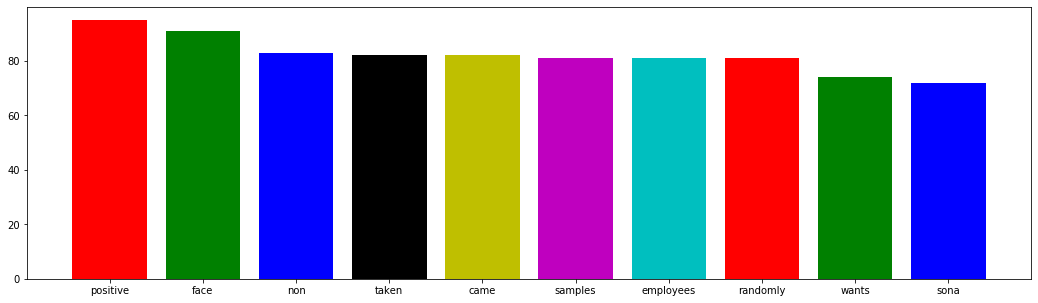

In [988]:
'''
freq_dist_dict = FreqDist(sum(df['clean_tweet_stemmed'].map(word_tokenize), []))
sorted_d = dict(sorted(freq_dist_dict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : \n ',sorted_d)
'''
tokens = df['clean_tweet_stemmed'].str.split().tolist()
flat_list_token = [item for sublist in tokens for item in sublist]
print(f' Total no. of Tokens in our data is {len(flat_list_token)}')

freq_count_tokens = Counter(flat_list_token)
freq_count_tokens_sorted = dict(sorted(freq_count_tokens.items(), key=operator.itemgetter(1),reverse=True))

plt.figure(figsize=(18,5))
plt.bar(*zip(*list(freq_count_tokens_sorted.items())[:10]), color='rgbkymc')
plt.show()

In [1036]:
df.drop('nlp',axis=1,inplace=True)

In [1082]:
'''
#df['clean_tweet_no_stemmed'].apply(lambda x: list(nlp(x).ents)).head(50)

for row in range(len(df)):
    doc = nlp(df.loc[row, "clean_tweet_no_stemmed"])
    for entity in doc.ents:
        print("\tText : {}, Entity : {}".format(entity.text, entity.label_))
'''       
NER_Tweet = []
for sent in df['clean_tweet_no_stemmed']:
    NER_Tweet.append([ent.label_ for ent in nlp(sent).ents])   
df['NER_unstemmed_tweet'] = NER_Tweet

In [1125]:
# df['NER_unstemmed_tweet'].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
# df['NER_unstemmed_tweet'].astype(str).str[1:-1]
df['NER_unstemmed_tweet'] = df['NER_unstemmed_tweet'].str.join(',')
df['NER_unstemmed_tweet'].replace('', np.nan, inplace=True)

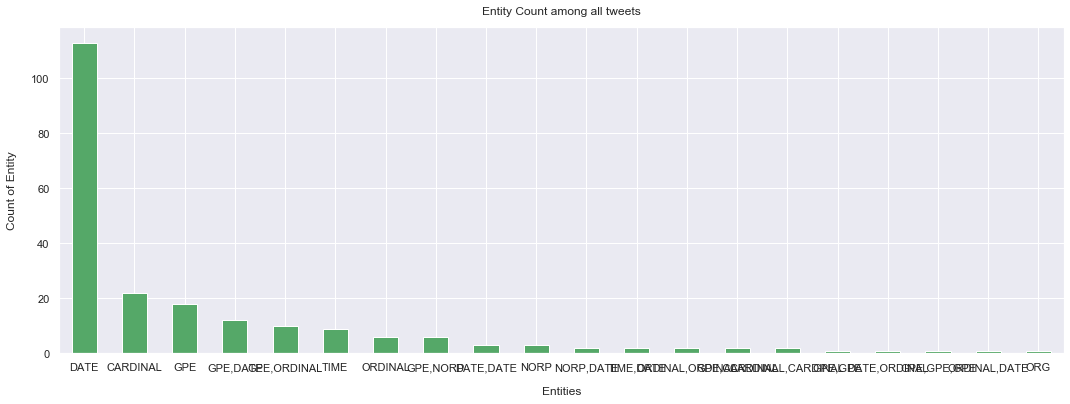

In [1179]:
# sns.countplot(x='NER_unstemmed_tweet', data=df)
sns.set(font_scale=1)
df['NER_unstemmed_tweet'].value_counts().plot(kind='bar', figsize=(18, 6), rot=0, color='g')
plt.xlabel("Entities", labelpad=14)
plt.ylabel("Count of Entity", labelpad=14)
plt.title("Entity Count among all tweets", y=1.02);

In [1180]:
df.head()

,user_name,tweet,followers,user_location,source,published_time,clean_tweet,Polarity_TextBlob,Polarity_NLTK,score_pos_nltk,score_neg_nltk,sentiment_textblob,sentiment_nltk,coordinates,geometry,clean_tweet_no_stemmed,clean_tweet_stemmed,NER_unstemmed_tweet
0,amnayousef_,RT @Jay_Apoorva18: #Cuddalore Police coffin da...,2,,Twitter for Android,2020-05-07 10:15:06,Apoorva18 Police coffin dance awareness Our po...,0.37,0.59,0.16,0.00,Positive,Positive,"(46.3144754, 11.0480288)",POINT (11.04803 46.31448),police coffin dance awareness police rock come...,police coffin dance awareness police rock come...,NaN
1,viraldubal1,RT @Aryanwarlord: #Corona proof individual htt...,111,"Gandhinagar, India",Twitter for Android,2020-05-07 10:15:05,proof individual,0.00,0.00,0.00,0.00,Neutral,Neutral,"(22.3511148, 78.6677428)",POINT (78.66774 22.35111),proof individual,proof individu,NaN
2,AmarBirsingh_,RT @sonakshisinha: What Sona wants to do to #C...,25,punajb india,Twitter for Android,2020-05-07 10:15:05,What Sona wants to do to collision,0.20,-0.36,0.00,0.29,Positive,Negative,"(46.3144754, 11.0480288)",POINT (11.04803 46.31448),sona wants collision,sona wants collis,NaN
3,TamuorM,RT @sonakshisinha: What Sona wants to do to #C...,83,"McKinney, TX",Twitter for Android,2020-05-07 10:15:01,What Sona wants to do to collision,0.20,-0.36,0.00,0.29,Positive,Negative,"(33.1976496, -96.6154471)",POINT (-96.61545 33.19765),sona wants collision,sona wants collis,NaN
4,gazavitogambino,RT @FrankBullitt39: UBER LOST 6.9 BILLION in 2...,70,,Twitter for iPhone,2020-05-07 10:14:55,UBER LOST 6 9 BILLION in 2019 Mr Khosrowshahi ...,0.00,0.26,0.20,0.13,Neutral,Positive,"(46.3144754, 11.0480288)",POINT (11.04803 46.31448),uber lost billion khosrowshahi claimed would p...,uber lost billion khosrowshahi claimed would p...,NaN


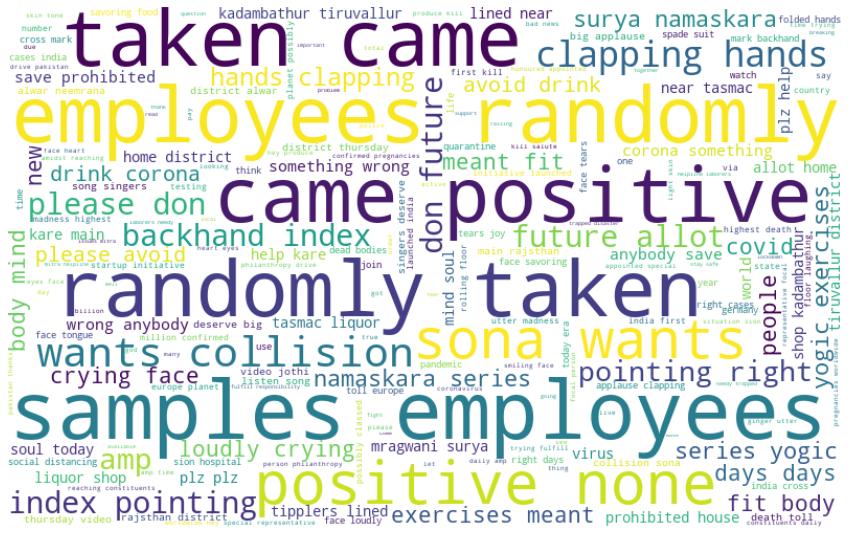

In [1235]:
#all_text = ','.join(list(df['clean_tweet_no_stemmed'].values))
all_text = ' '.join([text for text in df['clean_tweet_no_stemmed']])
wordcloud = WordCloud( width=800, height=500,background_color="white",contour_width=3,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()